Digit Classification using a Simple ANN (Keras)

Step 1: Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

Step 2: Load MNIST Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)  # (60000, 28, 28)
print("Testing data shape:", x_test.shape)    # (10000, 28, 28)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Training labels shape: (60000,)
Testing labels shape: (10000,)


Step 3: Display Example Images

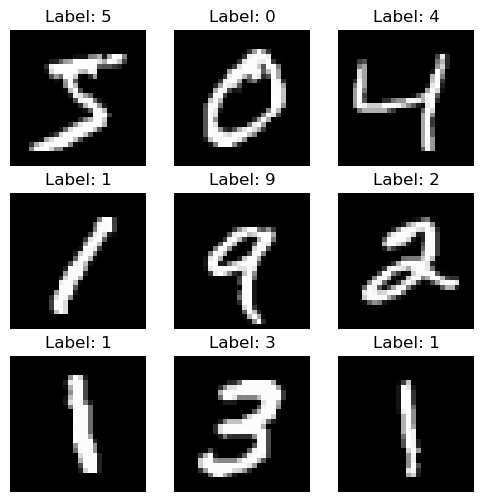

In [3]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

Step 4: Normalize & Preprocess Data

In [4]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

Flatten the images (28x28 -> 784)

In [5]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

Convert labels to one-hot encoding

In [6]:
y_train = to_categorical(y_train, 10)  # 10 classes (0–9)
y_test = to_categorical(y_test, 10)

Step 5: Build ANN Model

In [7]:
model = Sequential()

Input layer (784 inputs) + Hidden Layer 1 with 128 neurons

In [8]:
model.add(Dense(128, activation='relu', input_shape=(784,)))

c:\Users\cheta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Hidden Layer 2 with 64 neurons

In [9]:
model.add(Dense(64, activation='relu'))

Output layer (10 neurons for digits 0-9) with softmax

In [10]:
model.add(Dense(10, activation='softmax'))

Step 6: Compile Model

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Step 7: Train the Model

In [12]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8920 - loss: 0.3805 - val_accuracy: 0.9476 - val_loss: 0.1839
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9556 - loss: 0.1518 - val_accuracy: 0.9588 - val_loss: 0.1379
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9686 - loss: 0.1048 - val_accuracy: 0.9673 - val_loss: 0.1110
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9764 - loss: 0.0795 - val_accuracy: 0.9692 - val_loss: 0.1036
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9814 - loss: 0.0621 - val_accuracy: 0.9717 - val_loss: 0.0994
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9848 - loss: 0.0502 - val_accuracy: 0.9716 - val_loss: 0.1010
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9880 - loss: 0.0391 - val_accuracy: 0.9714 - val_loss: 0.0967
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9908 - loss: 0.0312 - val_accuracy: 0.

Step 8: Plot Accuracy & Loss

In [13]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Accuracy

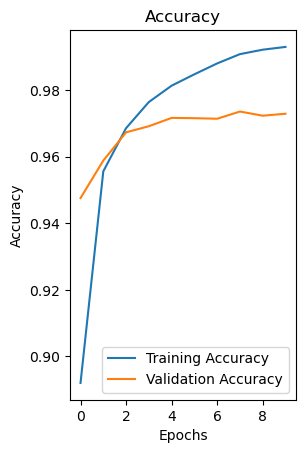

In [14]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Loss

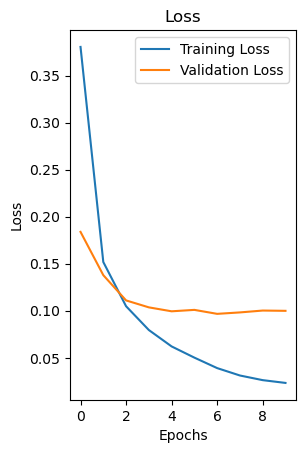

In [15]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Step 9: Test Prediction

In [16]:
sample = x_test[0].reshape(1, 784)   # take one test sample
pred = model.predict(sample)
print("Model Prediction:", np.argmax(pred))   # predicted digit
print("Actual Label:", np.argmax(y_test[0])) # actual digit


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Model Prediction: 7
Actual Label: 7


Show the image

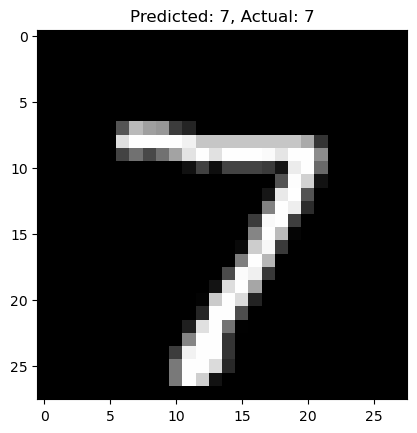

In [17]:
plt.imshow(x_test[0].reshape(28,28), cmap="gray")
plt.title(f"Predicted: {np.argmax(pred)}, Actual: {np.argmax(y_test[0])}")
plt.show()

Step 10: Calculate Trainable Parameters

In [18]:
model.summary()  # shows parameters layer by layer

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

Load Data → Get MNIST dataset (60k train, 10k test).

Preprocessing → Normalize (0–255 → 0–1), flatten (28×28 → 784), one-hot encode labels.

ANN Architecture

Input: 784 neurons (flattened image)

Hidden Layer 1: 128 neurons (ReLU)

Hidden Layer 2: 64 neurons (ReLU)

Output: 10 neurons (Softmax for 10 digits)

Compile Model → Use Adam optimizer + categorical crossentropy loss.

Training → Run for 10 epochs with batch size 128, monitor validation accuracy/loss.

Plot Graphs → Compare training & validation accuracy/loss.

Prediction → Test the ANN on one digit from the test set.

Parameters Calculation → Shown in model.summary() automatically.

👉 Example parameter calculation for first Dense layer:

(
784
×
128
)
+
128
=
100
,
480
 
parameters
(784×128)+128=100,480parameters